In [ ]:
# Import required libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_curve, auc, r2_score, confusion_matrix, accuracy_score
from scipy import stats
from sklearn import preprocessing
import warnings # Warnings
warnings.filterwarnings('ignore') # Ignore warnings
# Embed static images in notebook
%matplotlib inline

# Show upto 150 rows and columns in a DataFrame
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Peruse the Information files

In [ ]:
# Detecting the encoding of the files to be imported

import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print("Encoding of the application_data file: " + find_encoding('/content/applicant.csv'))
print("Encoding of the previous_application file: " + find_encoding('/content/loan.csv'))

Encoding of the application_data file: ascii
Encoding of the previous_application file: ascii


* The majority of the times, you won't have to check the encoding of the information records. However, it is a decent practice to really look at it to keep away from any blunders because of perusing the documents with some unacceptable encoding.

* In this way, both the documents are encoded as 'ascii'. We should import the records now.

In [ ]:
application_data = pd.read_csv('/content/applicant.csv', encoding = 'ascii')
loan_data = pd.read_csv('/content/loan.csv', encoding = 'ascii')

## Information Outline

In [ ]:
print('Application Data: ', application_data.shape)
print('Loan Data: ', loan_data.shape)

Application Data:  (1000, 15)
Loan Data:  (1000, 13)


In [ ]:
# Depictions of the datasets

application_data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [ ]:
loan_data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [ ]:
# Statistical summary of application data

application_data.describe(include = 'all')

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
count,1.000000e+03,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,938,747,404,1000.000000,817,332,543
unique,NaN,NaN,2,4,NaN,3,NaN,4,4,4,1,NaN,4,2,2
top,NaN,NaN,male,single,NaN,own,NaN,skilled employee / official,1 year,4 years,Registered under the applicant's name,NaN,Low,0,0
freq,NaN,NaN,690,548,NaN,713,NaN,630,339,339,404,NaN,603,269,274
mean,1.514763e+06,35.546000,NaN,NaN,1.155000,NaN,2.845000,NaN,NaN,NaN,NaN,0.963000,NaN,NaN,NaN
std,2.286764e+05,11.375469,NaN,NaN,0.362086,NaN,1.103718,NaN,NaN,NaN,NaN,0.188856,NaN,NaN,NaN
min,1.105364e+06,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1.321398e+06,27.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,1.529114e+06,33.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,1.707752e+06,42.000000,NaN,NaN,1.000000,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


In [ ]:
loan_data.describe(include = 'all')

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
count,1000,1.000000e+03,1000.000000,988,1.000000e+03,1000.000000,846,1000.000000,1000.000000,186,1000.000000,1000,1000.000000
unique,1000,NaN,NaN,9,NaN,NaN,3,NaN,NaN,2,NaN,5,NaN
top,d68d975e-edad-11ea-8761-1d6f9c1ff461,NaN,NaN,electronic equipment,NaN,NaN,car or other,NaN,NaN,bank,NaN,existing loans paid back duly till now,NaN
freq,1,NaN,NaN,280,NaN,NaN,332,NaN,NaN,139,NaN,530,NaN
mean,NaN,1.514763e+06,20.903000,NaN,3.271258e+06,2.973000,NaN,0.041000,0.052000,NaN,1.407000,NaN,0.300000
std,NaN,2.286764e+05,12.058814,NaN,2.822737e+06,1.118715,NaN,0.198389,0.222138,NaN,0.577654,NaN,0.458487
min,NaN,1.105364e+06,4.000000,NaN,2.500000e+05,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
25%,NaN,1.321398e+06,12.000000,NaN,1.365500e+06,2.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
50%,NaN,1.529114e+06,18.000000,NaN,2.319500e+06,3.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
75%,NaN,1.707752e+06,24.000000,NaN,3.972250e+06,4.000000,NaN,0.000000,0.000000,NaN,2.000000,NaN,1.000000


## Treating missing qualities and eliminating unessential factors

In [ ]:
# Get level of missing information for every segment and save it in another DataFrame

app_data_missing = pd.DataFrame(100*application_data.isnull().sum()/application_data.shape[0]).reset_index()

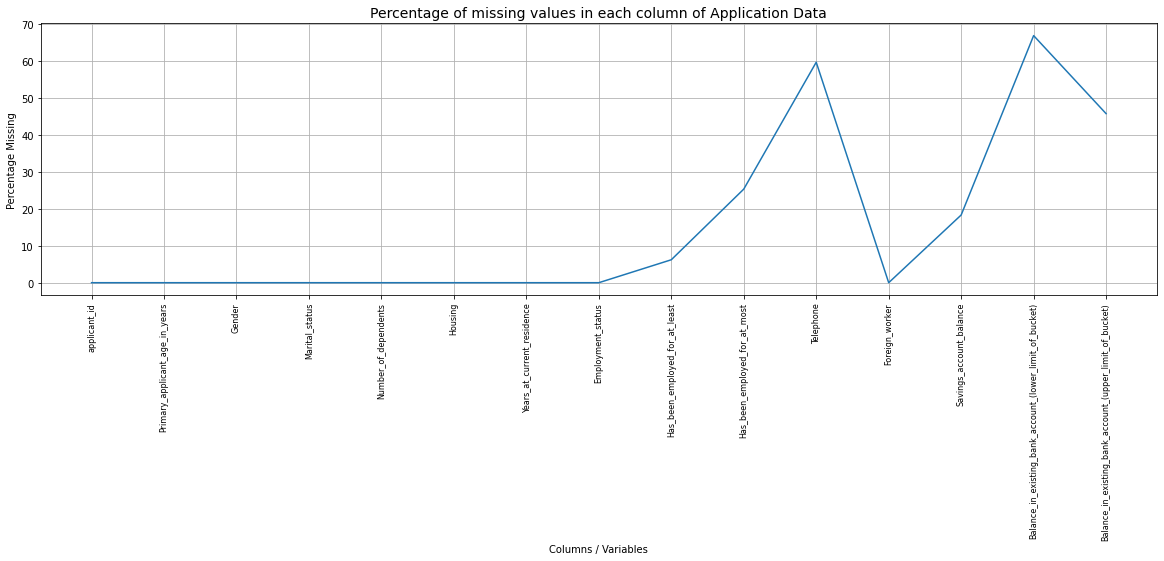

In [ ]:
# Creating a chart for missing qualities

plt.figure(figsize = (20,5))
plt.plot(app_data_missing['index'], app_data_missing[0])
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Percentage of missing values in each column of Application Data', fontsize = 14)
plt.xlabel('Columns / Variables', fontsize = 10)
plt.ylabel('Percentage Missing', fontsize = 10)
plt.grid(b = True)
plt.show()

* We can see that a significant number of the factors have a high level of missing qualities.

* Which allow us to make a DataFrame of the segments that have over 45% qualities as absent.

## Removing the higher null value segments from application and loan datafraem with treating the missing values.

In [ ]:
# Putting away the factors having >45% missing qualities in a rundown
miss_cols = list(app_data_missing.loc[app_data_missing[0] > 45, 'index'])
len(miss_cols)

3

* We can eliminate these 3 segments.

In [ ]:
# Eliminating the high missing segments
application_data.drop(miss_cols, axis = 1, inplace = True)

In [ ]:
# Checking the shape of application data again

application_data.shape

(1000, 12)

In [ ]:
# Printing rate missing upsides of every section
print(100*application_data.isnull().sum()/application_data.shape[0])

applicant_id                       0.0
Primary_applicant_age_in_years     0.0
Gender                             0.0
Marital_status                     0.0
Number_of_dependents               0.0
Housing                            0.0
Years_at_current_residence         0.0
Employment_status                  0.0
Has_been_employed_for_at_least     6.2
Has_been_employed_for_at_most     25.3
Foreign_worker                     0.0
Savings_account_balance           18.3
dtype: float64


The percentage of missing values for Has_been_employed_for_at_least, Has_been_employed_for_at_most, Savings_account_balance .

In [ ]:
application_data['Savings_account_balance'].value_counts()

Low          603
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

In [ ]:
# Treating the missing values.
app_data_1 = application_data[~application_data['Has_been_employed_for_at_least'].isnull()].copy()
app_data_2 = app_data_1[~app_data_1['Has_been_employed_for_at_most'].isnull()].copy()
app_data_3 = app_data_2[~app_data_2['Savings_account_balance'].isnull()].copy()

In [ ]:
app_data_3['Has_been_employed_for_at_least'] = app_data_3['Has_been_employed_for_at_least'].replace(np.nan, 0)
app_data_3['Has_been_employed_for_at_most'] = app_data_3['Has_been_employed_for_at_most'].replace(np.nan, 0)
app_data_3['Savings_account_balance'] = app_data_3['Savings_account_balance'].replace(np.nan, 0)


In [ ]:
print(100*app_data_3.isnull().sum()/app_data_3.shape[0])

applicant_id                      0.0
Primary_applicant_age_in_years    0.0
Gender                            0.0
Marital_status                    0.0
Number_of_dependents              0.0
Housing                           0.0
Years_at_current_residence        0.0
Employment_status                 0.0
Has_been_employed_for_at_least    0.0
Has_been_employed_for_at_most     0.0
Foreign_worker                    0.0
Savings_account_balance           0.0
dtype: float64


In [ ]:
app_data_3.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low
7,1705739,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,1,Low


In [ ]:
loan_data_missing = pd.DataFrame(100*loan_data.isnull().sum()/loan_data.shape[0]).reset_index()

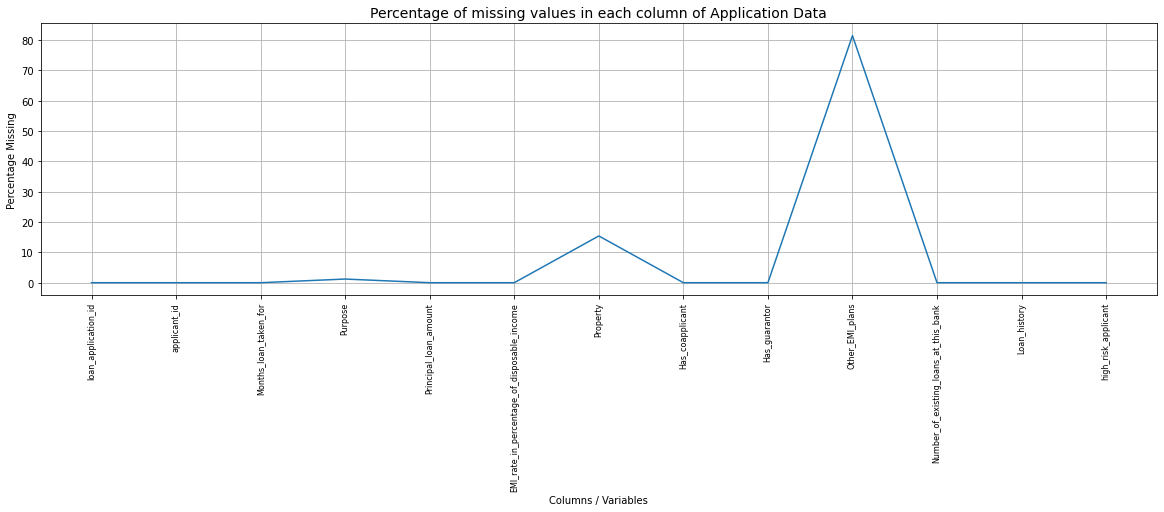

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(loan_data_missing['index'], loan_data_missing[0])
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Percentage of missing values in each column of Application Data', fontsize = 14)
plt.xlabel('Columns / Variables', fontsize = 10)
plt.ylabel('Percentage Missing', fontsize = 10)
plt.grid(b = True)
plt.show()

* We can see that a significant number of the factors have a high level of missing qualities.

* Which allow us to make a DataFrame of the segments that have over 45% qualities as absent.

In [ ]:
# Putting away the factors having >45% missing qualities in a rundown
miss_cols1 = list(loan_data_missing.loc[loan_data_missing[0] > 45, 'index'])
len(miss_cols1)

1

In [ ]:
# Eliminating the high missing segments
loan_data.drop(miss_cols1, axis = 1, inplace = True)

In [ ]:
# Checking the shape of application data again

loan_data.shape

(1000, 12)

In [ ]:
# Print percentage missing values of each column
print(100*loan_data.isnull().sum()/loan_data.shape[0])

loan_application_id                             0.0
applicant_id                                    0.0
Months_loan_taken_for                           0.0
Purpose                                         1.2
Principal_loan_amount                           0.0
EMI_rate_in_percentage_of_disposable_income     0.0
Property                                       15.4
Has_coapplicant                                 0.0
Has_guarantor                                   0.0
Number_of_existing_loans_at_this_bank           0.0
Loan_history                                    0.0
high_risk_applicant                             0.0
dtype: float64


The percentage of missing values for Property,Purpose.

In [ ]:
# Treating the missing values.
loan_data_1 = loan_data[~loan_data['Property'].isnull()].copy()
loan_data_2 = loan_data_1[~loan_data_1['Purpose'].isnull()].copy()


In [ ]:
loan_data_2['Purpose'] = loan_data_2['Purpose'].replace(np.nan, 0)
loan_data_2['Property'] = loan_data_2['Property'].replace(np.nan, 0)


In [ ]:
loan_data_2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
6,d68d9bb4-edad-11ea-bb16-0490ef14f12e,1428822,24,FF&E,2835000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0


In [ ]:
# Print percentage missing values of each column
print(100*loan_data_2.isnull().sum()/loan_data_2.shape[0])

loan_application_id                            0.0
applicant_id                                   0.0
Months_loan_taken_for                          0.0
Purpose                                        0.0
Principal_loan_amount                          0.0
EMI_rate_in_percentage_of_disposable_income    0.0
Property                                       0.0
Has_coapplicant                                0.0
Has_guarantor                                  0.0
Number_of_existing_loans_at_this_bank          0.0
Loan_history                                   0.0
high_risk_applicant                            0.0
dtype: float64


## Feature Engineering

We combine our appliction dataframe of credit acounts (loan_data_2) on the candidate id (applicant_id) with a left join. A left join implies that any applicant_id that is in loan_data_2 yet not in df won't be remembered for the new dataframe, and all lines in df will be held.


In [ ]:
df = app_data_3.merge(loan_data_2, on='applicant_id', how='left')

In [ ]:
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low,d68d989e-edad-11ea-b1d5-2bcf65006448,48.0,electronic equipment,5951000.0,2.0,real estate,0.0,0.0,1.0,existing loans paid back duly till now,1.0
1,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low,d68d995c-edad-11ea-814a-1b6716782575,12.0,education,2096000.0,2.0,real estate,0.0,0.0,1.0,critical/pending loans at other banks,0.0
2,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low,d68d99fc-edad-11ea-8841-17e8848060ae,42.0,FF&E,7882000.0,2.0,building society savings agreement/life insurance,0.0,1.0,1.0,existing loans paid back duly till now,0.0
3,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1705739,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,1,Low,d68d9c40-edad-11ea-b46c-5067ccf3672a,36.0,used vehicle,6948000.0,2.0,car or other,0.0,0.0,1.0,existing loans paid back duly till now,0.0


* We investigate the downright factors to evalute the number of remarkable sections, the names of these extraordinary passages and how frequently they happen in the dataset.

In [ ]:
# function for removing the signs from the dataframe
def signremove(h):
    h=(str(h).strip("years"))
    h=(str(h).replace("+",""))
    h=(str(h).strip("<"))
    return float(h)

In [ ]:
# Removing the year signs from df Has_been_employed_for_at_least
df['Has_been_employed_for_at_least']=df['Has_been_employed_for_at_least'].apply(signremove)

In [ ]:
# Removing the year signs from df Has_been_employed_for_at_most
df['Has_been_employed_for_at_most']=df['Has_been_employed_for_at_most'].apply(signremove)

## label encoding

In [ ]:
df.select_dtypes(include=['object']).columns.to_list()

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Savings_account_balance',
 'loan_application_id',
 'Purpose',
 'Property',
 'Loan_history']

This approach is extremely basic and it includes switching each worth in a segment over completely to a number. Consider a dataset of scaffolds having a section named "span types" having underneath values. 'Gender','Marital_status','Housing','Employment_status','Savings_account_balance','Purpose','Property','Loan_history'.



In [ ]:
# Importing the sklearn label encoding for Encode target labels with value between 0 and n_classes-1 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
# Adding label encoding for catgorical variables.
df["Gender"]= le.fit_transform(df["Gender"])
df["Marital_status"]= le.fit_transform(df["Marital_status"])
df["Housing"]= le.fit_transform(df["Housing"])
df["Employment_status"]= le.fit_transform(df["Employment_status"])
df["Savings_account_balance"]= le.fit_transform(df["Savings_account_balance"])
df["Purpose"]= le.fit_transform(df["Purpose"])
df["Property"]= le.fit_transform(df["Property"])
df["Loan_history"]= le.fit_transform(df["Loan_history"])

In [ ]:
# Depictions of the datasets
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1203873,22,0,1,1,1,2,1,1.0,4.0,1,1,d68d989e-edad-11ea-b1d5-2bcf65006448,48.0,5,5951000.0,2.0,2,0.0,0.0,1.0,3,1.0
1,1432761,49,1,3,2,1,3,3,4.0,7.0,1,1,d68d995c-edad-11ea-814a-1b6716782575,12.0,4,2096000.0,2.0,2,0.0,0.0,1.0,1,0.0
2,1207582,45,1,3,2,0,4,1,4.0,7.0,1,1,d68d99fc-edad-11ea-8841-17e8848060ae,42.0,0,7882000.0,2.0,0,0.0,1.0,1.0,3,0.0
3,1674436,53,1,3,2,0,4,1,1.0,4.0,1,1,NaN,NaN,9,NaN,NaN,3,NaN,NaN,NaN,5,NaN
4,1705739,35,1,3,1,2,2,0,1.0,4.0,1,1,d68d9c40-edad-11ea-b46c-5067ccf3672a,36.0,8,6948000.0,2.0,1,0.0,0.0,1.0,3,0.0


In [ ]:
df.isnull().sum()

applicant_id                                    0
Primary_applicant_age_in_years                  0
Gender                                          0
Marital_status                                  0
Number_of_dependents                            0
Housing                                         0
Years_at_current_residence                      0
Employment_status                               0
Has_been_employed_for_at_least                  0
Has_been_employed_for_at_most                   0
Foreign_worker                                  0
Savings_account_balance                         0
loan_application_id                            60
Months_loan_taken_for                          60
Purpose                                         0
Principal_loan_amount                          60
EMI_rate_in_percentage_of_disposable_income    60
Property                                        0
Has_coapplicant                                60
Has_guarantor                                  60


In [ ]:
df['Principal_loan_amount'] = df['Principal_loan_amount'].replace(np.nan, 0)
df['Number_of_existing_loans_at_this_bank'] = df['Number_of_existing_loans_at_this_bank'].replace(np.nan, 0)
df['EMI_rate_in_percentage_of_disposable_income'] = df['EMI_rate_in_percentage_of_disposable_income'].replace(np.nan, 0)
df['Months_loan_taken_for'] = df['Months_loan_taken_for'].replace(np.nan, 0)

In [ ]:
def impute_nan_add_vairable(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    DataFrame[ColName].fillna(Mode_Category,inplace=True)
# Call function to impute NAN values and add new importance feature
for Columns in ['Has_coapplicant','high_risk_applicant','Has_guarantor']:
    impute_nan_add_vairable(df,Columns)
    
# Display top 10 row to see the result of imputation
df[['Has_coapplicant','high_risk_applicant','Has_guarantor']].head(10)

,Has_coapplicant,high_risk_applicant,Has_guarantor
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

applicant_id                                    0
Primary_applicant_age_in_years                  0
Gender                                          0
Marital_status                                  0
Number_of_dependents                            0
Housing                                         0
Years_at_current_residence                      0
Employment_status                               0
Has_been_employed_for_at_least                  0
Has_been_employed_for_at_most                   0
Foreign_worker                                  0
Savings_account_balance                         0
loan_application_id                            60
Months_loan_taken_for                           0
Purpose                                         0
Principal_loan_amount                           0
EMI_rate_in_percentage_of_disposable_income     0
Property                                        0
Has_coapplicant                                 0
Has_guarantor                                   0


In [ ]:
df.dtypes

applicant_id                                     int64
Primary_applicant_age_in_years                   int64
Gender                                           int64
Marital_status                                   int64
Number_of_dependents                             int64
Housing                                          int64
Years_at_current_residence                       int64
Employment_status                                int64
Has_been_employed_for_at_least                 float64
Has_been_employed_for_at_most                  float64
Foreign_worker                                   int64
Savings_account_balance                          int64
loan_application_id                             object
Months_loan_taken_for                          float64
Purpose                                          int64
Principal_loan_amount                          float64
EMI_rate_in_percentage_of_disposable_income    float64
Property                                         int64
Has_coappl

In [ ]:
df.nunique().sort_values()

Has_guarantor_Imputed                            2
Has_guarantor                                    2
Has_coapplicant                                  2
high_risk_applicant_Imputed                      2
high_risk_applicant                              2
Foreign_worker                                   2
Has_coapplicant_Imputed                          2
Number_of_dependents                             2
Gender                                           2
Has_been_employed_for_at_least                   3
Has_been_employed_for_at_most                    3
Housing                                          3
Employment_status                                4
Property                                         4
Years_at_current_residence                       4
Savings_account_balance                          4
Marital_status                                   4
EMI_rate_in_percentage_of_disposable_income      5
Number_of_existing_loans_at_this_bank            5
Loan_history                   

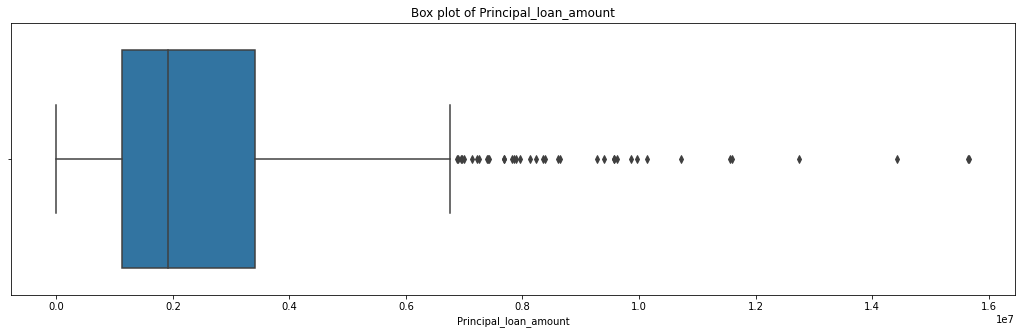

In [ ]:
plt.figure(figsize = (18,5))
sns.boxplot(df['Principal_loan_amount'])
plt.title('Box plot of Principal_loan_amount')
plt.show()

In [ ]:
df['Principal_loan_amount'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25     1126750.0
0.50     1920500.0
0.75     3415500.0
0.90     5536200.0
0.95     7395250.0
0.99    10914740.0
Name: Principal_loan_amount, dtype: float64

In [ ]:
df.dtypes

applicant_id                                     int64
Primary_applicant_age_in_years                   int64
Gender                                           int64
Marital_status                                   int64
Number_of_dependents                             int64
Housing                                          int64
Years_at_current_residence                       int64
Employment_status                                int64
Has_been_employed_for_at_least                 float64
Has_been_employed_for_at_most                  float64
Foreign_worker                                   int64
Savings_account_balance                          int64
loan_application_id                             object
Months_loan_taken_for                          float64
Purpose                                          int64
Principal_loan_amount                          float64
EMI_rate_in_percentage_of_disposable_income    float64
Property                                         int64
Has_coappl

## Correlation

We next check our continuous features to ensure that we do not have high levels of multicolinearity. Pairwise correlations under .7 should be accepted.

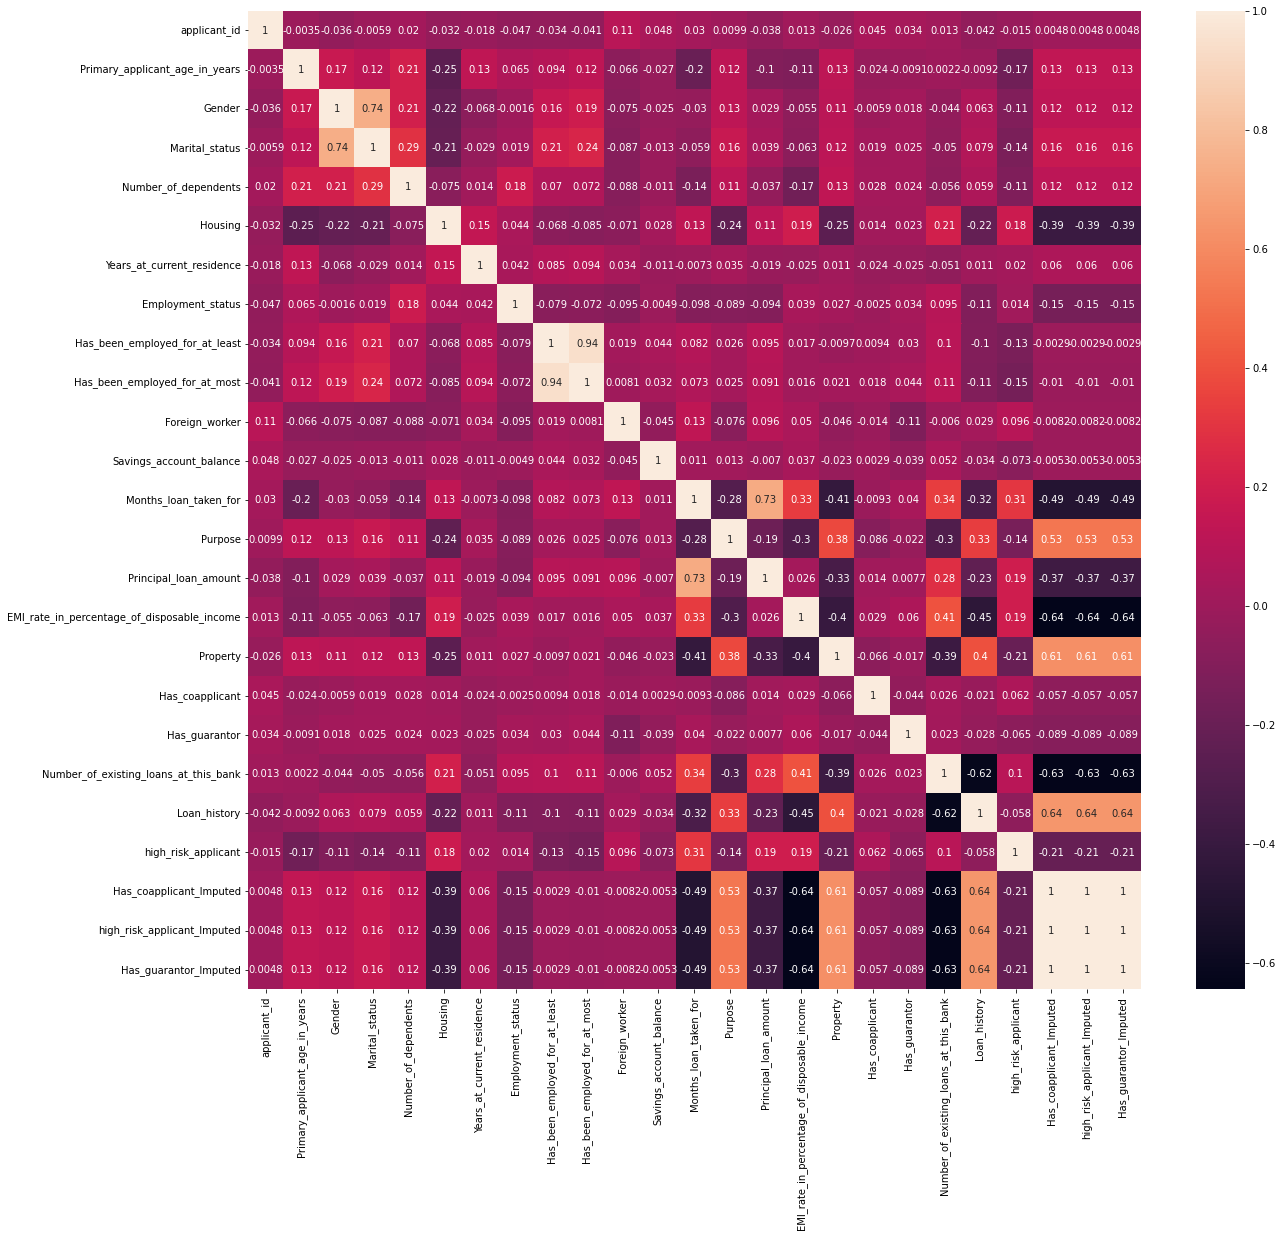

In [ ]:

plt.figure(figsize = (20, 18))
corr = df.corr()
sns.heatmap(corr, annot = True)

The above relationship network shows that none of our numeric factors have connection more prominent than .7 with another numeric variable. Accordingly we don't have to stress over multicollinearity (since we won't utilize straight characterization here) and don't have to eliminate any further factors.

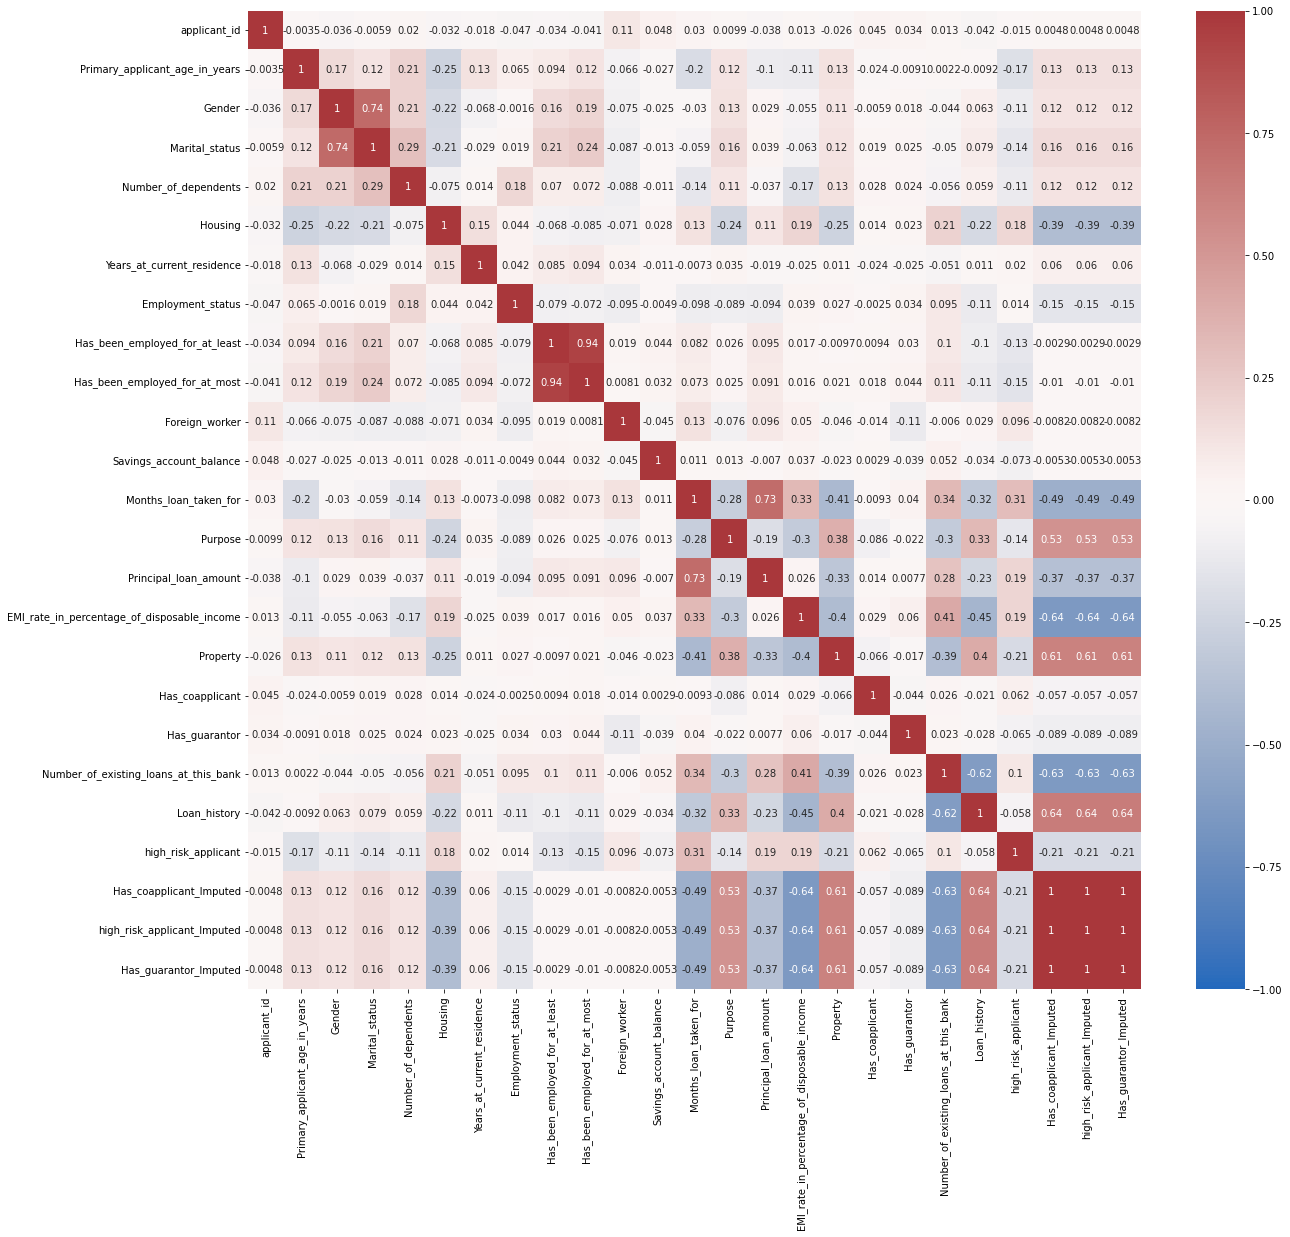

In [ ]:
# modified a few additional parameters.
plt.figure(figsize = (20, 18))
corr = df.corr()
sns.heatmap(corr, annot = True, vmax=1, vmin=-1, center=0, cmap='vlag')

* If none are passed, the values are inferred, which led to the negative values not going beyond 0.5. Since we know that the coefficients or correlation should be anchored at +1 and -1, we can pass these in.

* Species the worth at which to focus the colormap when we plot unique information. Since we maintain that the varieties should separate from 0, we ought to determine 0 as the contention here

## Functions

In [ ]:
#Giving the disarray framework to each model
def plot_confusion(matrix):
    cm = matrix
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels') 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['Risk', 'NoRisk'])
    ax.yaxis.set_ticklabels(['Risk', 'NoRisk'])


In [ ]:
#definind the data types.
df.dtypes

applicant_id                                     int64
Primary_applicant_age_in_years                   int64
Gender                                           int64
Marital_status                                   int64
Number_of_dependents                             int64
Housing                                          int64
Years_at_current_residence                       int64
Employment_status                                int64
Has_been_employed_for_at_least                 float64
Has_been_employed_for_at_most                  float64
Foreign_worker                                   int64
Savings_account_balance                          int64
loan_application_id                             object
Months_loan_taken_for                          float64
Purpose                                          int64
Principal_loan_amount                          float64
EMI_rate_in_percentage_of_disposable_income    float64
Property                                         int64
Has_coappl

In [ ]:
df = df.drop(["loan_application_id","applicant_id"],axis=1)

In [ ]:
# Normalizing the 
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset
   

* One of the reasons that it's easy to get confused between and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

* In normalization, we are changing the shape of the distribution of your data.

In [ ]:
df = normalize(df) # DataDrame fitting the normalize value.

In [ ]:
# The function takes a loaded dataset as input and returns the dataset split into two subsets.
y = df["high_risk_applicant"]
X = df.drop(["high_risk_applicant"],axis=1)
X = (X-X.min())/(X.max()-X.min())
X.head()


,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,Has_coapplicant_Imputed,high_risk_applicant_Imputed,Has_guarantor_Imputed
0,0.054545,0.0,0.333333,0.0,0.5,0.333333,0.333333,0.25,0.5,1.0,0.333333,0.666667,0.555556,0.379722,0.5,0.666667,0.0,0.0,0.25,0.6,0.0,0.0,0.0
1,0.545455,1.0,1.000000,1.0,0.5,0.666667,1.000000,1.00,1.0,1.0,0.333333,0.166667,0.444444,0.133742,0.5,0.666667,0.0,0.0,0.25,0.2,0.0,0.0,0.0
2,0.472727,1.0,1.000000,1.0,0.0,1.000000,0.333333,1.00,1.0,1.0,0.333333,0.583333,0.000000,0.502935,0.5,0.000000,0.0,1.0,0.25,0.6,0.0,0.0,0.0
3,0.618182,1.0,1.000000,1.0,0.0,1.000000,0.333333,0.25,0.5,1.0,0.333333,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.00,1.0,1.0,1.0,1.0
4,0.290909,1.0,1.000000,0.0,1.0,0.333333,0.000000,0.25,0.5,1.0,0.333333,0.500000,0.888889,0.443338,0.5,0.333333,0.0,0.0,0.25,0.6,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=54)#Ideally, you can split your original dataset into input (X) and output (y) columns, then call the function passing both arrays and have them split appropriately into train and test subsets.

##  Model training and evaluation

In this part, we'll prepare and testing 3 models, specifically Decision Tree, Random Forest and Gradient Boosting. We'll likewise assess their presentation at anticipating advance defaults and their likelihood.

To begin with, we'll assemble the models and take a gander at an assessment measurement for surveying the model's capacity to foresee class names, i.e., default or no default.

Accuracy:  0.6839080459770115


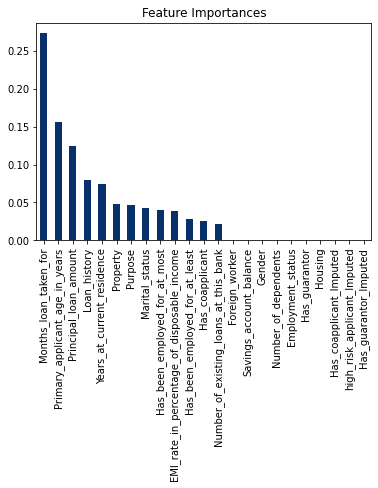

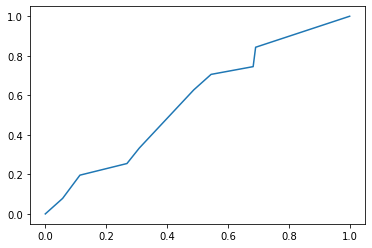

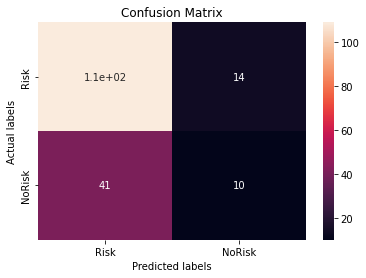

In [ ]:
# Decission Tree:
tree = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

print('Accuracy: ',tree.score(X_test, y_test))

y_tree_predict, y_tree_true = tree.predict(X_test), np.array(y_test.tolist())


#plot feature importances
s_dt = pd.Series(data = tree.feature_importances_, index = X.columns).sort_values( ascending = False)
s_dt.plot(kind = 'bar', colormap= 'Blues_r')
plt.xticks(rotation = 90)
plt.title('Feature Importances')
plt.show()

#plot roc curve
fpr_dt, tpr_dt, _ = roc_curve(y_tree_true, tree.predict_proba(X_test)[:,1])
plt.plot(fpr_dt, tpr_dt)
plt.show()

#plot confusion matrix
cm = confusion_matrix(y_tree_true, y_tree_predict)
plot_confusion(cm)

NOTE: Here we really should be doing some sort of feature selection. We might use forward or backward selection, or perhaps start by using the most important features from the decision tree, or random forest models. We want all the features for our model to be statistically significant (as indicated by the corresponding p-value).

Accuracy:  0.735632183908046


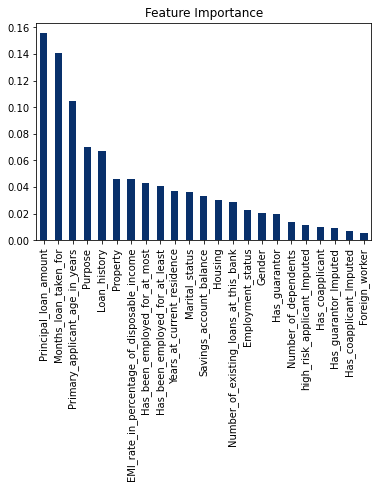

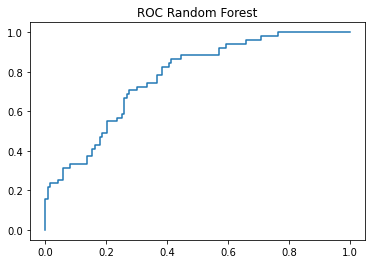

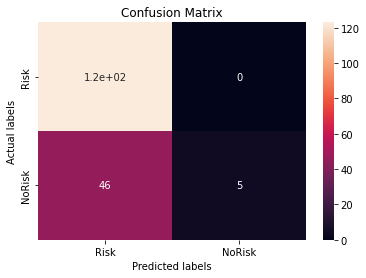

In [ ]:
# Random Forest
forest = RandomForestClassifier(max_depth = 6).fit(X_train, y_train)

print('Accuracy: ',forest.score(X_test, y_test))



y_forest_predict, y_forest_true = forest.predict(X_test), np.array(y_test.tolist())


#plot feature importances
s_dt = pd.Series(data = forest.feature_importances_, index = X.columns).sort_values( ascending = False)
s_dt.plot(kind = 'bar', colormap= 'Blues_r')
plt.title('Feature Importance')
plt.show()

#plot roc curve
fpr_rf, tpr_rf, _ = roc_curve(y_forest_true, forest.predict_proba(X_test)[:,1])

plt.plot(fpr_rf, tpr_rf)
plt.title("ROC Random Forest")
plt.show()

#plot confusion matrix
cm = confusion_matrix(y_forest_true, y_forest_predict)
plot_confusion(cm)

Accuracy:  0.6781609195402298


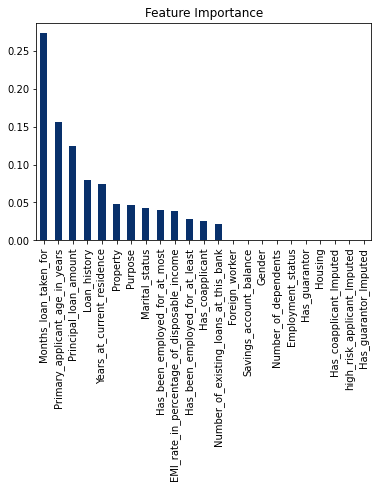

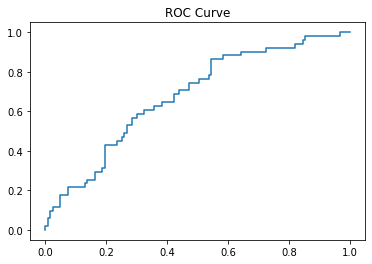

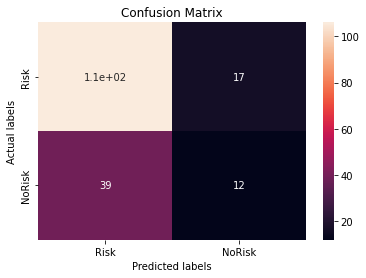

In [ ]:
# GradientBoostingClassifier
boost = GradientBoostingClassifier(max_depth=5).fit(X_train, y_train)

print('Accuracy: ',boost.score(X_test, y_test))



s_dt = pd.Series(data = tree.feature_importances_, index = X.columns).sort_values( ascending = False)
s_dt.plot(kind = 'bar', colormap= 'Blues_r')
plt.title('Feature Importance')
plt.show()


y_boost_predict, y_boost_true = boost.predict(X_test), np.array(y_test.tolist())
fpr_boost, tpr_boost, _ = roc_curve(y_boost_true, boost.predict_proba(X_test)[:,1])

plt.plot(fpr_boost, tpr_boost)
plt.title('ROC Curve')
plt.show()

cm = confusion_matrix(y_boost_true, y_boost_predict)

plot_confusion(cm)

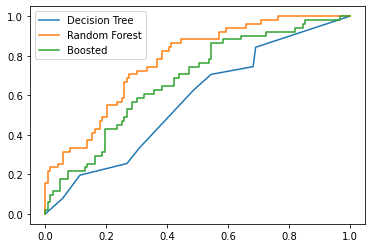

In [ ]:
plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_boost, tpr_boost)
plt.legend([ 'Decision Tree', 'Random Forest', 'Boosted'])

* An underlying go through of the potential models we could use on this information lets us know that the random forest model appears to be a decent model to investigate further.

* The ROC diagram likewise has the most noteworthy region under the ROC bend, as displayed previously.

* Moreover, the misleading negative rate is low, while the bogus positive rate is high. This may be useful assuming that we have advance experts that can figure out all applications checked '1' by hand while consequently dismissing any set apart as '0,' with the assumption that the quantity of bogus negatives will be somewhat low.

## XGBOOST HYPERPARAMETER

In [ ]:
import xgboost as xgb
import time
start_time = time.time()
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=100,  gamma=5,colsample_bytree=.6, subsample=0.8, scoring = 'f1',scale_pos_weight=1)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapse


Duration: 0 seconds


gamma [default=5, alias: min_split_loss]

* A node is split only when the resulting split gives a positive reduction in the loss function.
* Gamma specifies the minimum loss reduction required to make a split.
* It makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
* The larger gamma is, the more conservative the algorithm will be.
* Range: [0,∞]

In [ ]:
# Traning the XGBoost model
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
model.fit(X_train,y_train, verbose=True, eval_metric=eval_metric, eval_set=eval_set)

[0]	validation_0-auc:0.618569	validation_0-error:0.264851	validation_1-auc:0.619321	validation_1-error:0.293103
[1]	validation_0-auc:0.739215	validation_0-error:0.252475	validation_1-auc:0.669855	validation_1-error:0.270115
[2]	validation_0-auc:0.754712	validation_0-error:0.237624	validation_1-auc:0.700383	validation_1-error:0.252874
[3]	validation_0-auc:0.786667	validation_0-error:0.237624	validation_1-auc:0.739678	validation_1-error:0.270115
[4]	validation_0-auc:0.810284	validation_0-error:0.220297	validation_1-auc:0.734577	validation_1-error:0.275862
[5]	validation_0-auc:0.831304	validation_0-error:0.212871	validation_1-auc:0.759923	validation_1-error:0.270115
[6]	validation_0-auc:0.824727	validation_0-error:0.232673	validation_1-auc:0.760322	validation_1-error:0.264368
[7]	validation_0-auc:0.817427	validation_0-error:0.237624	validation_1-auc:0.762235	validation_1-error:0.264368
[8]	validation_0-auc:0.818418	validation_0-error:0.235149	validation_1-auc:0.770046	validation_1-error:0

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.01, max_depth=7,
              scoring='f1', subsample=0.8)

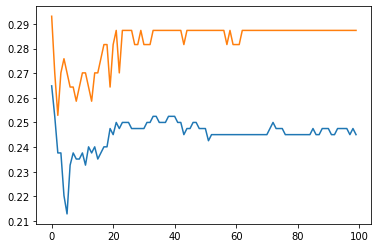

In [ ]:
error_train = model.evals_result()['validation_0']['error']
error_test =  model.evals_result()['validation_1']['error']
plt.plot(range(len(error_train)), error_train)
plt.plot(range(len(error_test)), error_test)

* If you want to look at classification error, change ['auc'] to ['error'] within ax.plot results is the y-axis values, and epochs is your 'n_estimators' valu

In [ ]:
def model_performance(target, predictions):
  fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[16,4])
  ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])

  metric = metrics.confusion_matrix(target,predictions)
  confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
  sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  plt.plot(fpr, tpr)
  

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  ax3.plot(fpr, tpr)
  roc_auc = auc(fpr, tpr)
  ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
  ax3.legend(loc='lower right')
  ax3.plot([0,1],[0,1],'r--')
  ax3.set_xlim([-0.1,1.0])
  ax3.set_ylim([-0.1,1.01])
  ax3.set_ylabel('True Positive Rate')
  ax3.set_xlabel('False Positive Rate')
  plt.tight_layout()
  print(f'Area Under the Curve: {round(roc_auc,2)}')


    
  plt.show()

* Metrics
In this session, I'll discuss common metrics used to evaluate models.

* Classification metrics
When performing classification predictions, there's four types of outcomes that could occur.

* True positives are when you predict an observation belongs to a class and it actually does belong to that class.
True negatives are when you predict an observation does not belong to a class and it actually does not belong to that class.
* False positives occur when you predict an observation belongs to a class when in reality it does not.
False negatives occur when you predict an observation does not belong to a class when in fact it does.
* These four outcomes are often plotted on a confusion matrix. The following confusion matrix is an example for the case of binary classification. You would generate this matrix after making predictions on your test data and then identifying each prediction as one of the four possible outcomes described above.

Area Under the Curve: 0.51


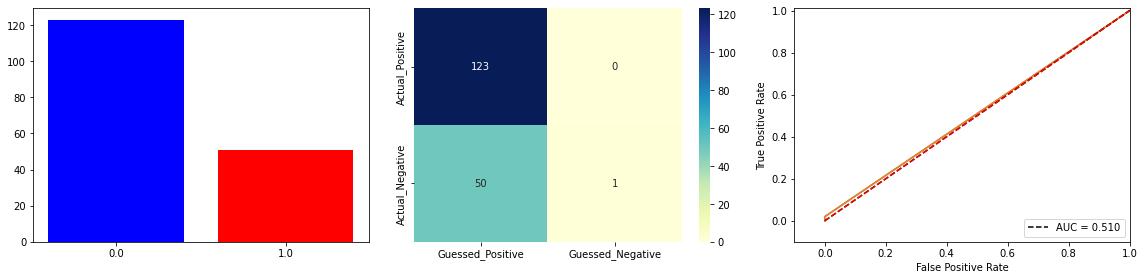

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       123
         1.0       1.00      0.02      0.04        51

    accuracy                           0.71       174
   macro avg       0.86      0.51      0.43       174
weighted avg       0.80      0.71      0.60       174

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1, 'scoring': 'f1'}
[0.06487595 0.04667924 0.06758036 0.04830167 0.0545311  0.05382813
 0.037105   0.05480115 0.05351392 0.         0.0487193  0.08451251
 0.06510211 0.05742356 0.05432511 0.07530477 0.         0.
 0.08519273 0.04820342 0.         0.         0.        ]
Precision = 0

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics
predictions = model.predict(X_test)
model_performance(pd.Series(y_test), pd.Series(predictions))
print(metrics.classification_report(y_test,predictions))
print(model.get_xgb_params())
print(model.feature_importances_)
print("Precision = {}".format(precision_score(y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
print(metrics.confusion_matrix(y_test, predictions))

* In this kernel, we have discussed the XGBoost hyperparameters which are divided into 3 categories - general parameters, booster parameters and learning task parameters.Showing the all paramter have feature importance.

## MAX VOTING

* Max-voting a ballot, which is by and large utilized for order issues, is one of the least complex approaches to consolidating expectations from various ml calculations.

In [ ]:
start_time = time.time()
model1 = DecisionTreeClassifier()# Decision Tree.
model2 = RandomForestClassifier(class_weight='balanced')# Random Forest.
model3 = GradientBoostingClassifier()# Gradient Boosting.

model1.fit(X_train,y_train)# Decision Tree fitting the model.
model2.fit(X_train,y_train)# Random Forest fitting the model.
model3.fit(X_train,y_train)# Gradient Boosting fitting the model.


pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)


print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 1 seconds


* Understand the ins and outs of voting as well as its applications in machine learning.Combining machine learning models can significantly enhance the quality of your predictive modeling.

Area Under the Curve: 0.59


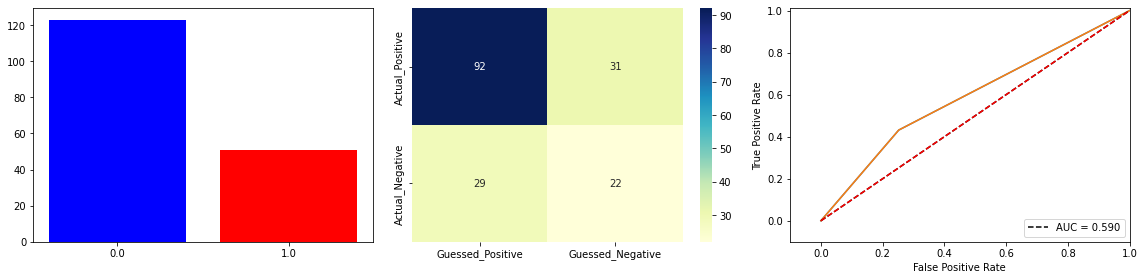

In [ ]:
model_performance(pd.Series(y_test), pd.Series(pred1))

Area Under the Curve: 0.54


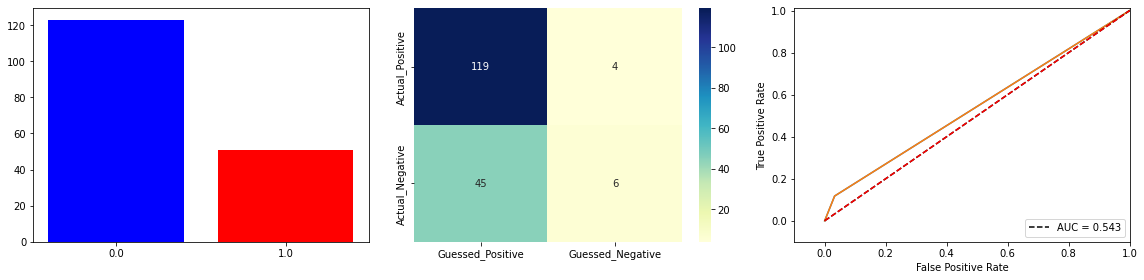

In [ ]:
model_performance(pd.Series(y_test), pd.Series(pred2))

Area Under the Curve: 0.6


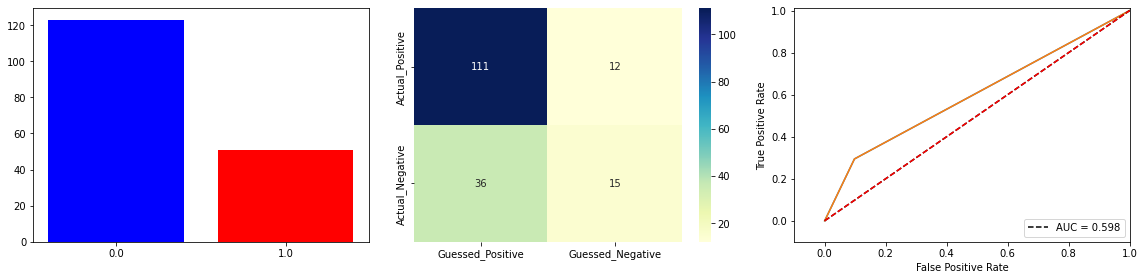

In [ ]:
model_performance(pd.Series(y_test), pd.Series(pred3))

* Stacking,  as stacked generalization, is an ensemble method where the models are combined using another machine learning algorithm. The basic idea is to train machine learning algorithms with training dataset.

## MAX VOTING ENSEMBLING TECHNIQUE

* Ensemble classification models can be powerful machine learning tools capable of achieving excellent performance and generalizing well to new, unseen datasets.

* The value of an ensemble classifier is that, in joining together the predictions of multiple classifiers, it can correct for errors made by any individual classifier, leading to better accuracy overall.

Area Under the Curve: 0.58


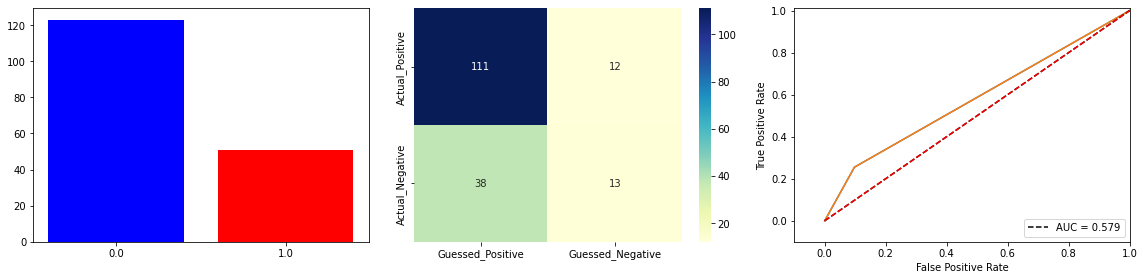

Recall = 0.5786704925872788


In [ ]:
import statistics as s
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, s.mode([pred1[i], pred2[i], pred3[i]]))
model_performance(pd.Series(y_test), pd.Series(final_pred))
print("Recall = {}".format(recall_score(y_test, final_pred, average='macro')))

Area Under the Curve: 0.58


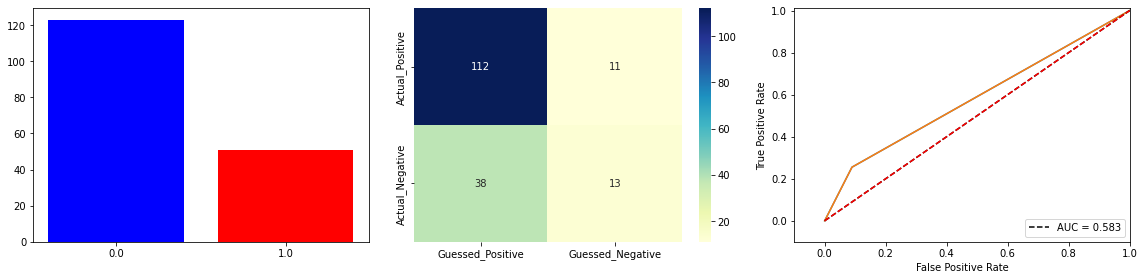

Recall = 0.5827355332376853


In [ ]:
from sklearn.ensemble import VotingClassifier
model_vc = VotingClassifier(estimators=[('dt', model1), ('rf', model2), ('bt',model3 )], voting='hard')
model_vc.fit(X_train,y_train)
pred_vc=model_vc.predict(X_test)
model_performance(pd.Series(y_test), pd.Series(pred_vc))
print("Recall = {}".format(recall_score(y_test, pred_vc, average='macro')))

## Deploying machine learning models for batch prediction.

* Offline models can be optimized to handle a high volume of job instances and run more complex models. In batch production mode, you don't need to worry about scaling or managing servers either.

* Batch prediction can be as simple as calling the predict function with a data set of input variables. 

* However, building the model may require multiple stages in the batch processing framework

## Deployment, and application development.

CreditRiskPrediction: Data-driven credit risk prediction in Pythom, covering techniques of exploratory analytics, data aggregation, merging and cleansing, feature engineering, but more importantly, model building and evaluation.

CreditRiskScale: Faster and scalable credit risk models with Microsoft Server , using the state-of-the-art machine learning algorithms provided by the MicrosoftML.

CreditRiskScale (part 2): Train multiple ML models with hyper-parameter selection in parallel by using rxExec().

CreditRiskDeploy: Deploy a credit risk model as a web service with Python Flask and Django Server Operationalization, leveraging the mrsdeploy package.

CreditRiskShinyApp: Credit risk application through REST API, with integration with the Flask & HTMl framework.

## Conclusions

* An initial examination of the potential models we could use on this data reveals that the irregular backwoods model appears to be a good model to investigate further.

* This model has the most noteworthy overall precision at 0.74 candidates were correctly predicted to be financially commendable (112) and 14 candidates were revised to be credit uncommendable.

* The ROC graph also has the highest area under the ROC curve, as shown above.

* Furthermore, the false negative rate is low but the false positive rate is high. This could be useful if we had loan specialists who could manually sort through all applications marked 'Yes,' while automatically rejecting any marked 'No,' with the expectation that the number of false negatives would be low.

* On the other hand, if we lack the resources to review these loan applications and are concerned about the costs associated with falsely accepting a loan.

* Several future research directions emerge as well. To begin, large datasets for experiments and applications, particularly more exploration of credit scoring data structures, should be collected to validate our findings. Second, additional research into the reasons why the Neural Network model performs the worst across all accuracy metrics is encouraged.